<a href="https://colab.research.google.com/github/Hamxea/Multi-label-Classification/blob/master/_With_GLOVE_Pre_trained_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Label Text Classification of Text Document or News


 ### DATASET

Toxic Comment Classification dataset. a multi-label text classfication data consisting of many wikipedia comments which have been labeled by humans according to their relative toxicity comments labels such as "toxic", "severe_toxic", "obscene", "threat", "insult", and  "identity_hate". The dataset has approximately ~160k observation in total, ~125k with zero labels (toxicity) of any type, and approximately ~35k classified in one or more toxicity categories.




*   Dataset Link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge





#### DATA CHARACTERISTICS (TRAIN DATASET)
* Number of data points	159571
* Number data points of type toxic	15294
* Number data points of type severe_tocic	1595
* Number data points of type obscene	8449
* Number data points of type threat	478
* Number data points of type insult	7877
* Number data points of type identity_hate	1405
* Observations in one or more class	35098
* Unclassified observation	124473


### Import necessary libraries for the experiment

In [0]:
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='hamzasharoon', api_key='9le0c8M5GUNRAKyJoIt2')


# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Using TensorFlow backend.
'apt' is not recognized as an internal or external command,
operable program or batch file.


"Double check with Python 3"


In [0]:
#from google.colab import files
#uploaded = files.upload()

#from google.colab import drive
#!kaggle competitions download -c Toxic Comment Classification Challenge -p /content/gdrive/My\ Drive/kaggle/Colab Notebooks/Dataset

### Loading the necessary data files and data Preparation

In [0]:
#Train data
train = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/train.csv')
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [0]:
train = train.loc[(train['toxic'] == 1) | (train['severe_toxic'] == 1) | (train['obscene'] ==1) | (train['threat'] == 1) | (train['insult'] == 1) | (train['identity_hate'] ==1)]

train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


In [0]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000
mean,0.942619,0.098305,0.520740,0.029461,0.485485,0.086595
std,0.232576,0.297736,0.499585,0.169099,0.499805,0.281249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Clean the Train data, specifically remove punctuations

In [0]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in train['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

train['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey what is it\n talk \nWhat is it an exclusi...,1,0,0,0,0,0
16,0007e25b2121310b,Bye \n\nDont look come or think of comming bac...,1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian \n\nArchangel WHi...,1,0,1,0,1,1
43,00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,1,0,1,0,1,0
44,001956c382006abd,Im Sorry \n\nIm sorry I screwed around with so...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP GET FUCKEEED UP GOT A DRINK THA...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,Tony Sidaway is obviously a fistfuckee He love...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Pages deletion You thought I was gone ...,1,0,1,0,0,0


In [0]:
#Test data
df_test = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test.csv')
df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


### Clean the Test data, specifically remove punctuations

In [0]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in df_test['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

df_test['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then youll ...
1,0000247867823ef7,From RfC \n\n The title is fine as it is IMO
2,00013b17ad220c46,\n\n Sources \n\n Zawe Ashton on Lapland —...
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I dont anonymously edit articles at all
5,0001ea8717f6de06,Thank you for understanding I think very highl...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia Such e...
7,000247e83dcc1211,Dear god this site is horrible
8,00025358d4737918,\n Only a fool can believe in such numbers \n...
9,00026d1092fe71cc,Double Redirects \n\n When fixing double red...


In [0]:
df_test_labels = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test_labels.csv')

df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [0]:
test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


### Merge the df_test and test_labels into 1 dataframe (test)

In [0]:
#Merge the df_test and test_labels into 1 dataframe (test)
test = pd.merge(test_labels, df_test, on='id', how='inner')
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding I think very highl...
1,000247e83dcc1211,0,0,0,0,0,0,Dear god this site is horrible
2,0002f87b16116a7f,0,0,0,0,0,0,Somebody will invariably try to add Religion ...
3,0003e1cccfd5a40a,0,0,0,0,0,0,\n\n It says it right there that it IS a type...
4,00059ace3e3e9a53,0,0,0,0,0,0,\n\n Before adding a new product to the list...
5,000663aff0fffc80,0,0,0,0,0,0,this other one from 1897
6,000689dd34e20979,0,0,0,0,0,0,Reason for banning throwing \n\n This articl...
7,000844b52dee5f3f,0,0,0,0,0,0,blocked from editing Wikipedia
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
9,000968ce11f5ee34,0,0,0,0,0,0,Please stop If you continue to vandalize Wikip...


In [0]:
test = test.loc[(test['toxic'] == 1) | (test['severe_toxic'] == 1) | (test['obscene'] ==1) | (test['threat'] == 1) | (test['insult'] == 1) | (test['identity_hate'] ==1)]

test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
24,0013fed3aeae76b7,1,0,1,0,1,1,DJ Robinson is gay as hell he sucks his dick s...
29,0017d4d47894af05,1,0,1,0,1,0,Fuck off you antisemitic cunt
38,001d739c97bc2ae4,1,0,0,0,0,0,How dare you vandalize that page about the HMS...
40,001eff4007dbb65b,1,0,1,0,1,0,No he is an arrogant self serving immature idi...
89,005f47397e07e12f,1,0,0,0,0,0,Eek but shes cute in an earthy kind of way Can...
106,0071940212267fea,1,0,1,0,0,0,Well it sucks to have a university to be nickn...
107,0072b9c3697ab8cc,1,0,1,0,1,0,Argh \n\n Some random idiot deleted the whol...
124,0081b14d79f54b31,1,0,1,1,0,0,we hate america and we are going to bomb the s...
125,00842d1024b19972,1,0,1,0,1,0,Bold textYOU SUCK \n\n \n\n U SUCK HANNAH M...


In [0]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000
mean,0.942619,0.098305,0.520740,0.029461,0.485485,0.086595
std,0.232576,0.297736,0.499585,0.169099,0.499805,0.281249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Number of records in the train and test data

In [0]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (16225, 8)
Test data shape (6234, 8)


In [0]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values in train data.')
print('The dataset has', test.isna().sum().sum(), 'missing values in test data.')

# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates in train data.')
print('The dataset has', test.duplicated().sum(), 'duplicates in test data.')

The dataset has 0 missing values in train data.
The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.
The dataset has 0 duplicates in test data.


### CORRELATION BETWEEN DATA LABELS

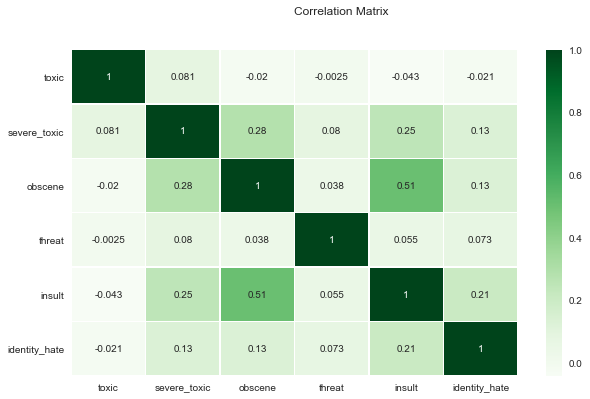

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

### DATA PREPROCESSING
Deep Neural Networks input layers make use of input variables to feed the network for training the model. But in this task (experiment), we're dealing with words text. How do we represent these words in order to feed our model?

In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.


#### Word Embedding
Two ways to feed embeddings to neural networks:
   * Using your own word embeddings by training
   * Using pre-trained embedding (e.g Word2vec, lad2vec, Glove etc)
   


In [0]:
#Convert text to vectors using keras preprocessing library tools

X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [0]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [0]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (16225, 200)
X_test shape:  (6234, 200)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [0]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

D:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



## METHODS ( CNN, RNN, LSTM, all  using Glove)

#### We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.

In [0]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model

In [0]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

## USING PRE-TRAINED EMBEDDING (GLOVE)

## A) "Glove" as a pre-trained Embedding

#### Prepare the pre-trained embedding layer

Load glove embedding corpus

In [0]:
glove_file = open('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/glove.6B.100d.txt', encoding="utf8")
embeddings_index = dict()
for line in glove_file:
    val = line.split(' ')
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    embeddings_index[word] = coefs
glove_file.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


#### Prepare the embedding matrix vectors in order to feed/pass the neural network

In [0]:
# create a weight matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## 1) Convolutional Neural Network (CNN) with Glove

In [0]:
CNN_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
CNN_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


### Visualize the Orchestrated CNN-Glove Model Architecture

In [0]:
CNN_Glove_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          4041700   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 100)          40100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
__________

In [0]:
#plot the CNN_GLove model architecture

#plot_model(CNN_Glove_model, to_file='CNN_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='CNN_Glove_model_plot.png')

In [0]:
CNN_Glove_model_fit = CNN_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Instructions for updating:
Use tf.cast instead.
Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 18s 1ms/step - loss: 0.6749 - acc: 0.7933 - mean_pred: 0.3660 - fmeasure: 0.7075 - precision: 0.7298 - auroc: 0.8008 - recall: 0.6907 - val_loss: 0.3592 - val_acc: 0.8473 - val_mean_pred: 0.3441 - val_fmeasure: 0.7632 - val_precision: 0.8547 - val_auroc: 0.8474 - val_recall: 0.6896
Epoch 2/15
14602/14602 [==============================] - 18s 1ms/step - loss: 0.3911 - acc: 0.8264 - mean_pred: 0.3653 - fmeasure: 0.7452 - precision: 0.7944 - auroc: 0.8600 - recall: 0.7080 - val_loss: 0.3587 - val_acc: 0.8415 - val_mean_pred: 0.3285 - val_fmeasure: 0.7378 - val_precision: 0.9015 - val_auroc: 0.8691 - val_recall: 0.6248
Epoch 3/15
14602/14602 [==============================] - 18s 1ms/step - loss: 0.3757 - acc: 0.8358 - mean_pred: 0.3654 - fmeasure: 0.7586 - precision: 0.8123 - auroc: 0.8749 - recall: 0.7177 - val_loss: 0.3497 - val_acc:

### Evaluate the CNN+Glove Model accuracy of our trained model

In [0]:
CNN_Glove_train_score = CNN_Glove_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', CNN_Glove_train_score[0])
print('Train Accuracy:', CNN_Glove_train_score[1])

16225/16225 [==============================] - 9s 538us/step
Train Loss: 0.29994144593622357
Train Accuracy: 0.8747714808027623


### Evaluate the CNN+Glove accuracy base our test samples

In [0]:
CNN_Glove_test_score = CNN_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_Glove_test_score[0])
print('Test Accuracy:', CNN_Glove_test_score[1])

6234/6234 [==============================] - 3s 543us/step
Test Loss: 0.3065251549218838
Test Accuracy: 0.8604694961315935


In [0]:
#Predicting......
print('Predicting....')
y_pred = CNN_Glove_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
6234/6234 [==============================] - 3s 537us/step


### Plot Training & Validation Accuracy with the Loss values of the CNN-Glove Model

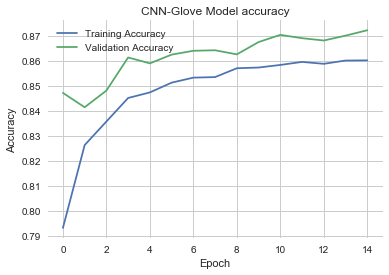

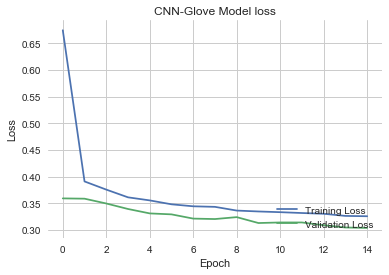

In [0]:
# Plot training & validation accuracy values
plt.plot(CNN_Glove_model_fit.history['acc'])
plt.plot(CNN_Glove_model_fit.history['val_acc'])
plt.title('CNN-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_Glove_model_fit.history['loss'])
plt.plot(CNN_Glove_model_fit.history['val_loss'])
plt.title('CNN-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 2) Recurrent Neural Network (RNN) with Glove

In [0]:
RNN_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [0]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

RNN_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated RNN-Glove MODEL Architecture

In [0]:
RNN_Glove_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 100)          4041700   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 100)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 200, 25)           3150      
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 25)           100       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 25)           0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1300      
__________

In [0]:
#plot the RNN_GLove model architecture

#plot_model(RNN_Glove_model, to_file='RNN_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#mage(retina=True, filename='RNN_Glove_model_plot.png')

In [0]:
RNN_Glove_model_fit = RNN_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 8s 521us/step - loss: 0.4582 - acc: 0.7797 - mean_pred: 0.3652 - fmeasure: 0.6904 - precision: 0.7310 - auroc: 0.8134 - recall: 0.6975 - val_loss: 0.4286 - val_acc: 0.7948 - val_mean_pred: 0.4028 - val_fmeasure: 0.7042 - val_precision: 0.7258 - val_auroc: 0.8577 - val_recall: 0.6843
Epoch 2/15
14602/14602 [==============================] - 7s 449us/step - loss: 0.3933 - acc: 0.7924 - mean_pred: 0.3618 - fmeasure: 0.7049 - precision: 0.7349 - auroc: 0.8628 - recall: 0.7053 - val_loss: 0.4328 - val_acc: 0.8047 - val_mean_pred: 0.4075 - val_fmeasure: 0.7521 - val_precision: 0.6878 - val_auroc: 0.8662 - val_recall: 0.8304
Epoch 3/15
14602/14602 [==============================] - 7s 448us/step - loss: 0.3915 - acc: 0.8004 - mean_pred: 0.3609 - fmeasure: 0.7065 - precision: 0.7614 - auroc: 0.8686 - recall: 0.6797 - val_loss: 0.4428 - val_acc: 0.7953 - val_mean_pred: 0.4233 - val_fmeasur

### Evaluate the RNN-Glove Model accuracy of our trained model

In [0]:
RNN_Glove_train_score = RNN_Glove_model.evaluate(X_train, y_train, batch_size = batch_size2, verbose = 1)
print('Train loss:', RNN_Glove_train_score[0])
print('Train accuracy:', RNN_Glove_train_score[1])

16225/16225 [==============================] - 3s 207us/step
Train loss: 0.3805144006188368
Train accuracy: 0.8576476886092422


### Evaluate the RNN-Glove accuracy base our test samples

In [0]:
RNN_Glove_test_score = RNN_Glove_model.evaluate(X_test, y_test, batch_size = batch_size2, verbose = 1)
print('Test loss:', RNN_Glove_test_score[0])
print('Test accuracy:', RNN_Glove_test_score[1])

6234/6234 [==============================] - 1s 202us/step
Test loss: 0.3775832095913371
Test accuracy: 0.8458186492997941


### Plot Training & Validation Accuracy with the Loss values of the RNN-Glove Model

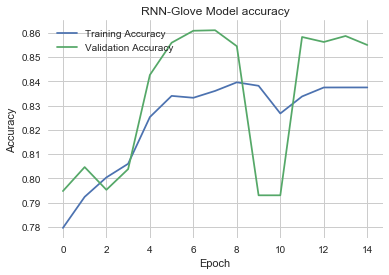

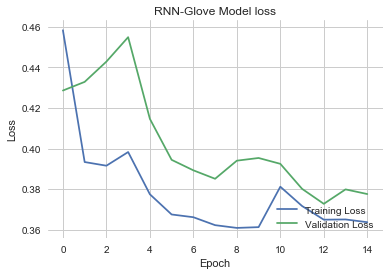

In [0]:
# Plot training & validation accuracy values
plt.plot(RNN_Glove_model_fit.history['acc'])
plt.plot(RNN_Glove_model_fit.history['val_acc'])
plt.title('RNN-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_Glove_model_fit.history['loss'])
plt.plot(RNN_Glove_model_fit.history['val_loss'])
plt.title('RNN-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 3) LSTM with Glove

In [0]:
LSTM_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated LSTM-Glove Model Architecture

In [0]:
LSTM_Glove_model.summary()
#plot the CNN_GLove model architecture

#plot_model(LSTM_Glove_model, to_file='LSTM_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='LSTM_Glove_model_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 100)          4041700   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 25)           12600     
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 25)           100       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 25)           0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1300      
__________

In [0]:
LSTM_Glove_model_fit = LSTM_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 16s 1ms/step - loss: 0.4109 - acc: 0.8274 - mean_pred: 0.3632 - fmeasure: 0.7433 - precision: 0.7937 - auroc: 0.8470 - recall: 0.7035 - val_loss: 0.3985 - val_acc: 0.8548 - val_mean_pred: 0.3753 - val_fmeasure: 0.7728 - val_precision: 0.8758 - val_auroc: 0.8892 - val_recall: 0.6916
Epoch 2/15
14602/14602 [==============================] - 14s 955us/step - loss: 0.3441 - acc: 0.8526 - mean_pred: 0.3610 - fmeasure: 0.7828 - precision: 0.8377 - auroc: 0.8970 - recall: 0.7377 - val_loss: 0.3839 - val_acc: 0.8595 - val_mean_pred: 0.4047 - val_fmeasure: 0.7928 - val_precision: 0.8370 - val_auroc: 0.9021 - val_recall: 0.7533
Epoch 3/15
14602/14602 [==============================] - 14s 961us/step - loss: 0.3359 - acc: 0.8572 - mean_pred: 0.3606 - fmeasure: 0.7889 - precision: 0.8466 - auroc: 0.9053 - recall: 0.7406 - val_loss: 0.3815 - val_acc: 0.8621 - val_mean_pred: 0.4176 - val_fmeasu

### Evaluate the LSTM+Glove train and test score

In [0]:
#train
LSTM_Glove_train_score = LSTM_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_Glove_train_score[0])
print('Train Accuracy:', LSTM_Glove_train_score[1])

#test
LSTM_Glove_test_score = LSTM_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_Glove_test_score[0])
print('Test Accuracy:', LSTM_Glove_test_score[1])

14602/14602 [==============================] - 4s 277us/step
Train Loss: 0.3298646329102688
Train Accuracy: 0.8800963696968456
6234/6234 [==============================] - 2s 293us/step
Test Loss: 0.33664095023139606
Test Accuracy: 0.866778981046949


### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model



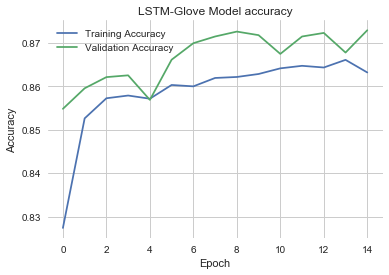

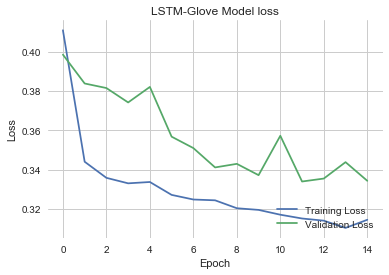

In [0]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_Glove_model_fit.history['acc'])
plt.plot(LSTM_Glove_model_fit.history['val_acc'])
plt.title('LSTM-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Glove_model_fit.history['loss'])
plt.plot(LSTM_Glove_model_fit.history['val_loss'])
plt.title('LSTM-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 4) Bidirecitional LSTM with Glove

In [0]:
Bil_LSTM_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])


Bil_LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated Bidirectional LSTM-Glove Model Architecture

In [0]:
Bil_LSTM_Glove_model.summary()
#plot the CNN_GLove model architecture

#plot_model(Bil_LSTM_Glove_model, to_file='Bil_LSTM_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='Bil_LSTM_Glove_model_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          4041700   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 50)           25200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 50)           200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
__________

In [0]:
Bil_LSTM_Glove_model_fit = Bil_LSTM_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 34s 2ms/step - loss: 0.4330 - acc: 0.8237 - mean_pred: 0.3655 - fmeasure: 0.7498 - precision: 0.7839 - auroc: 0.8435 - recall: 0.7240 - val_loss: 0.3946 - val_acc: 0.8533 - val_mean_pred: 0.4220 - val_fmeasure: 0.7944 - val_precision: 0.7941 - val_auroc: 0.8861 - val_recall: 0.7949
Epoch 2/15
14602/14602 [==============================] - 31s 2ms/step - loss: 0.3383 - acc: 0.8557 - mean_pred: 0.3617 - fmeasure: 0.7891 - precision: 0.8359 - auroc: 0.8954 - recall: 0.7494 - val_loss: 0.3997 - val_acc: 0.8491 - val_mean_pred: 0.4537 - val_fmeasure: 0.8003 - val_precision: 0.7582 - val_auroc: 0.9017 - val_recall: 0.8475
Epoch 3/15
14602/14602 [==============================] - 31s 2ms/step - loss: 0.3271 - acc: 0.8604 - mean_pred: 0.3639 - fmeasure: 0.7968 - precision: 0.8404 - auroc: 0.9055 - recall: 0.7601 - val_loss: 0.3785 - val_acc: 0.8656 - val_mean_pred: 0.4240 - val_fmeasure: 

### Evaluate the Bidirectional LSTM+Glove train and test score

In [0]:
#train
Bil_LSTM_Glove_train_score = Bil_LSTM_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_LSTM_Glove_train_score[0])
print('Train Accuracy:', Bil_LSTM_Glove_train_score[1])

#test
Bil_LSTM_Glove_test_score = Bil_LSTM_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_LSTM_Glove_test_score[0])
print('Test Accuracy:', Bil_LSTM_Glove_test_score[1])

14602/14602 [==============================] - 12s 848us/step
Train Loss: 0.3099679234190814
Train Accuracy: 0.8860202175168987
6234/6234 [==============================] - 5s 878us/step
Test Loss: 0.3180722825929527
Test Accuracy: 0.8738905302522884


### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM-Glove Model


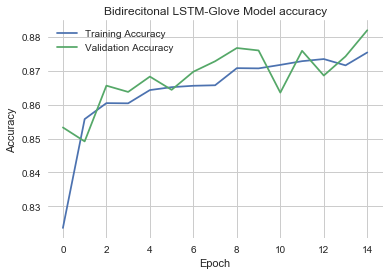

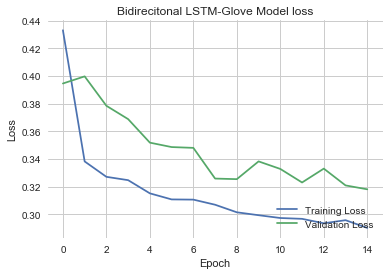

In [0]:

# Plot training & validation accuracy values
plt.plot(Bil_LSTM_Glove_model_fit.history['acc'])
plt.plot(Bil_LSTM_Glove_model_fit.history['val_acc'])
plt.title('Bidirecitonal LSTM-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_Glove_model_fit.history['loss'])
plt.plot(Bil_LSTM_Glove_model_fit.history['val_loss'])
plt.title('Bidirecitonal LSTM-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 5) Gated Recurrent (GRU) with Glove

In [0]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
GRU_Glove_model = Model(sequence_input, preds)
GRU_Glove_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])


### Visualize the Orchestrated GRU+Glove MODEL Architecture

In [0]:
GRU_Glove_model.summary()

#plot the GRU model architecture

#plot_model(GRU_Glove_model, to_file='GRU_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='GRU_Glove_model_plot.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 200, 100)     4041700     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_5 (SpatialDro (None, 200, 100)     0           embedding_5[0][0]                
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 200, 128)     87936       spatial_dropout1d_5[0][0]        
__________________________________________________________________________________________________
conv1d_2 (

In [0]:
GRU_Glove_model_fit = GRU_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 114s 8ms/step - loss: 0.4059 - acc: 0.8097 - mean_pred: 0.3729 - fmeasure: 0.7257 - precision: 0.7633 - auroc: 0.8329 - recall: 0.7027 - val_loss: 0.3421 - val_acc: 0.8532 - val_mean_pred: 0.3693 - val_fmeasure: 0.7855 - val_precision: 0.8207 - val_auroc: 0.8855 - val_recall: 0.7534
Epoch 2/15
14602/14602 [==============================] - 129s 9ms/step - loss: 0.3351 - acc: 0.8587 - mean_pred: 0.3640 - fmeasure: 0.7949 - precision: 0.8346 - auroc: 0.8971 - recall: 0.7602 - val_loss: 0.3148 - val_acc: 0.8665 - val_mean_pred: 0.3655 - val_fmeasure: 0.8065 - val_precision: 0.8360 - val_auroc: 0.9052 - val_recall: 0.7795
Epoch 3/15
14602/14602 [==============================] - 135s 9ms/step - loss: 0.3142 - acc: 0.8686 - mean_pred: 0.3630 - fmeasure: 0.8094 - precision: 0.8492 - auroc: 0.9107 - recall: 0.7742 - val_loss: 0.3012 - val_acc: 0.8693 - val_mean_pred: 0.3601 - val_fmeasur

### Evaluate the GRU+Glove Model train and test score

In [0]:
#Train
GRU_Glove_train_score = GRU_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_Glove_train_score[0])
print('Train Accuracy:', GRU_Glove_train_score[1])

#Test
GRU_Glove_test_score = GRU_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_Glove_test_score[0])
print('Test Accuracy:', GRU_Glove_test_score[1])

14602/14602 [==============================] - 26s 2ms/step
Train Loss: 0.24090803659398202
Train Accuracy: 0.8988837483418737
6234/6234 [==============================] - 11s 2ms/step
Test Loss: 0.2715485428564817
Test Accuracy: 0.8781681347053939


### Plot Training & Validation Accuracy with the Loss values of the GRU+ Glove Model

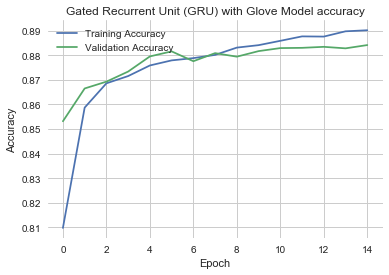

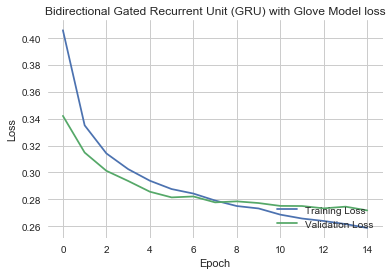

In [0]:
# Plot training & validation accuracy values
plt.plot(GRU_Glove_model_fit.history['acc'])
plt.plot(GRU_Glove_model_fit.history['val_acc'])
plt.title('Gated Recurrent Unit (GRU) with Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_Glove_model_fit.history['loss'])
plt.plot(GRU_Glove_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 6) Bidirectional Gated Recurrent (GRU) + Glove

In [0]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
Bil_GRU_Glove_model = Model(sequence_input, preds)
Bil_GRU_Glove_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated Bidirectional GRU+Glove Model Architecture




In [0]:
Bil_GRU_Glove_model.summary()

#plot the GRU model architecture

#plot_model(Bil_GRU_Glove_model, to_file='Bil_GRU_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='Bil_GRU_Glove_model_plot.png') 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 200, 100)     4041700     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_6 (SpatialDro (None, 200, 100)     0           embedding_6[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 200, 256)     175872      spatial_dropout1d_6[0][0]        
__________________________________________________________________________________________________
conv1d_3 (

In [0]:
Bil_GRU_Glove_model_fit = Bil_GRU_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 381s 26ms/step - loss: 0.3711 - acc: 0.8390 - mean_pred: 0.3698 - fmeasure: 0.7695 - precision: 0.8062 - auroc: 0.8795 - recall: 0.7441 - val_loss: 0.3198 - val_acc: 0.8647 - val_mean_pred: 0.3666 - val_fmeasure: 0.8038 - val_precision: 0.8328 - val_auroc: 0.9058 - val_recall: 0.7771
Epoch 2/15
14602/14602 [==============================] - 408s 28ms/step - loss: 0.3171 - acc: 0.8682 - mean_pred: 0.3635 - fmeasure: 0.8086 - precision: 0.8497 - auroc: 0.9130 - recall: 0.7728 - val_loss: 0.2981 - val_acc: 0.8751 - val_mean_pred: 0.3522 - val_fmeasure: 0.8152 - val_precision: 0.8649 - val_auroc: 0.9187 - val_recall: 0.7712
Epoch 3/15
14602/14602 [==============================] - 447s 31ms/step - loss: 0.2983 - acc: 0.8755 - mean_pred: 0.3613 - fmeasure: 0.8197 - precision: 0.8593 - auroc: 0.9227 - recall: 0.7845 - val_loss: 0.2904 - val_acc: 0.8763 - val_mean_pred: 0.3613 - val_fmea

### Evaluate the GRU+Glove Model train and test score

In [0]:
#Train
Bil_GRU_Glove_train_score = Bil_GRU_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_GRU_Glove_train_score[0])
print('Train Accuracy:', Bil_GRU_Glove_train_score[1])

#Test
Bil_GRU_Glove_test_score = Bil_GRU_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_GRU_Glove_test_score[0])
print('Test Accuracy:', Bil_GRU_Glove_test_score[1])

14602/14602 [==============================] - 88s 6ms/step
Train Loss: 0.22470759746228616
Train Accuracy: 0.9037346837455614
6234/6234 [==============================] - 38s 6ms/step
Test Loss: 0.2736187055348432
Test Accuracy: 0.8785424472278305


### Plot Training & Validation Accuracy with the Loss values of the Bil GRU + Glove Model

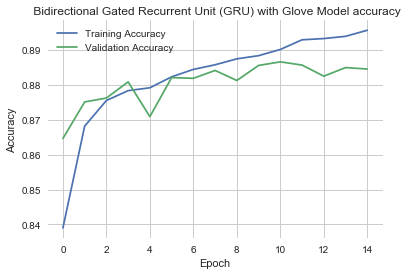

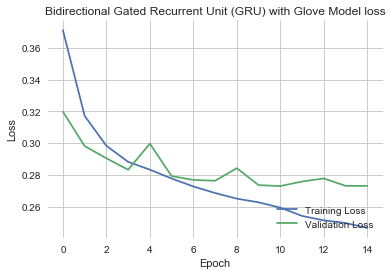

In [0]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_Glove_model_fit.history['acc'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_acc'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) with Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_Glove_model_fit.history['loss'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Evaluation of Experiment With GLOVE Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model) 

In [0]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'AUC', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN with Glove', 'RNNs with Glove', 'LSTM with Glove', ' Bidirectional LSTM with Glove', 'GRU with Glove', 'Bidirectional GRU with Glove'],
                       [
                        #Loss Evaluation
                        round(np.max(CNN_Glove_model_fit.history['loss']), 3), round(np.max(RNN_Glove_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['loss']), 3), round(np.max(GRU_Glove_model_fit.history['loss']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(CNN_Glove_model_fit.history['acc']), 3), round(np.max(RNN_Glove_model_fit.history['acc']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['acc']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['acc']), 3), round(np.max(GRU_Glove_model_fit.history['acc']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['acc']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.max(CNN_Glove_model_fit.history['mean_pred']), 3), round(np.max(RNN_Glove_model_fit.history['mean_pred']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.max(GRU_Glove_model_fit.history['mean_pred']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['mean_pred']), 3)],
						
                        #F1-Measure Evaluation fmeasure
                        [round(np.max(CNN_Glove_model_fit.history['fmeasure']), 3), round(np.max(RNN_Glove_model_fit.history['fmeasure']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.max(GRU_Glove_model_fit.history['fmeasure']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['fmeasure']), 3)],
						             
                        #Precision Evaluation precision
                        [round(np.max(CNN_Glove_model_fit.history['precision']), 3), round(np.max(RNN_Glove_model_fit.history['precision']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['precision']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['precision']), 3), round(np.max(GRU_Glove_model_fit.history['precision']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['precision']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.max(CNN_Glove_model_fit.history['auroc']), 3), round(np.max(RNN_Glove_model_fit.history['auroc']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['auroc']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['auroc']), 3), round(np.max(GRU_Glove_model_fit.history['auroc']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['auroc']), 3)],
                       
                        #Recall Evaluation
                        [round(np.max(CNN_Glove_model_fit.history['recall']), 3), round(np.max(RNN_Glove_model_fit.history['recall']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['recall']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['recall']), 3), round(np.max(GRU_Glove_model_fit.history['recall']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Glove_trained_embedding_with the max of the evaluation matrics (per model) _table')

D:\Program Files\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Computing the mean of the evaluation matrics (per model) 

In [0]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'AUC', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN with Glove', 'RNNs with Glove', 'LSTM with Glove', ' Bidirectional LSTM with Glove', 'GRU with Glove', 'Bidirectional GRU with Glove'],
                       [
                        #Loss Evaluation
                        round(np.mean(CNN_Glove_model_fit.history['loss']), 3), round(np.mean(RNN_Glove_model_fit.history['loss']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['loss']), 3), round(np.mean(GRU_Glove_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.mean(CNN_Glove_model_fit.history['acc']), 3), round(np.mean(RNN_Glove_model_fit.history['acc']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['acc']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['acc']), 3), round(np.mean(GRU_Glove_model_fit.history['acc']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['acc']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.mean(CNN_Glove_model_fit.history['mean_pred']), 3), round(np.mean(RNN_Glove_model_fit.history['mean_pred']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.mean(GRU_Glove_model_fit.history['mean_pred']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['mean_pred']), 3)],
						
                        #F1-Measure Evaluation fmeasure
                        [round(np.mean(CNN_Glove_model_fit.history['fmeasure']), 3), round(np.mean(RNN_Glove_model_fit.history['fmeasure']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.mean(GRU_Glove_model_fit.history['fmeasure']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['fmeasure']), 3)],
						             
                        #Precision Evaluation precision
                        [round(np.mean(CNN_Glove_model_fit.history['precision']), 3), round(np.mean(RNN_Glove_model_fit.history['precision']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['precision']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['precision']), 3), round(np.mean(GRU_Glove_model_fit.history['precision']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['precision']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.mean(CNN_Glove_model_fit.history['auroc']), 3), round(np.mean(RNN_Glove_model_fit.history['auroc']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['auroc']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['auroc']), 3), round(np.mean(GRU_Glove_model_fit.history['auroc']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['auroc']), 3)],
                       
                        #Recall Evaluation
                        [round(np.mean(CNN_Glove_model_fit.history['recall']), 3), round(np.mean(RNN_Glove_model_fit.history['recall']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['recall']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['recall']), 3), round(np.mean(GRU_Glove_model_fit.history['recall']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Glove_trained_embedding_with the Mean value of the evaluation matrics (per model) _table')

D:\Program Files\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Score Confusion Table

In [0]:
# concat all training, validation and testing accuracy scores

CNN_Glove_Accuracy = ['Convolutional Neural Network (CNN) with Glove', 
                np.max(CNN_Glove_model_fit.history['acc']), 
                np.max(CNN_Glove_model_fit.history['val_acc']), 
                CNN_Glove_test_score[1]]

RNN_GLove_Accuracy = ['Recurrent Neural Networks (RNNs) with Glove', 
                np.max(RNN_Glove_model_fit.history['acc']), 
                np.max(RNN_Glove_model_fit.history['val_acc']), 
                RNN_Glove_test_score[1]]

LSTM_Glove_Accuracy = ['LSTM with Glove', 
                  np.max(LSTM_Glove_model_fit.history['acc']), 
                  np.max(LSTM_Glove_model_fit.history['val_acc']), 
                  LSTM_Glove_test_score[1]]

Bidirectional_LSTM_Glove_Accuracy = ['Bidirectional LSTM with Glove', 
                    np.max(Bil_LSTM_Glove_model_fit.history['acc']), 
                    np.max(Bil_LSTM_Glove_model_fit.history['val_acc']), 
                    Bil_LSTM_Glove_test_score[1]]

GRU_Glove_Accuracy = ['GRU with Glove', 
                    np.max(GRU_Glove_model_fit.history['acc']), 
                    np.max(GRU_Glove_model_fit.history['val_acc']), 
                    GRU_Glove_test_score[1]]

Bidirectional_GRU_Glove_Accuracy = ['Bidirectional GRU with Glove', 
                    np.max(Bil_GRU_Glove_model_fit.history['acc']), 
                    np.max(Bil_GRU_Glove_model_fit.history['val_acc']), 
                    Bil_GRU_Glove_test_score[1]]


# create dataframe
experimentalResult = pd.DataFrame([CNN_Glove_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([CNN_Glove_Accuracy, RNN_GLove_Accuracy, LSTM_Glove_Accuracy, Bidirectional_LSTM_Glove_Accuracy, 
                                                GRU_Glove_Accuracy, Bidirectional_GRU_Glove_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult
print(experimentalResult)

                                               Training Accuracy  \
Model                                                              
Convolutional Neural Network (CNN) with Glove           0.860305   
Convolutional Neural Network (CNN) with Glove           0.860305   
Recurrent Neural Networks (RNNs) with Glove             0.839543   
LSTM with Glove                                         0.866057   
Bidirectional LSTM with Glove                           0.875360   
GRU with Glove                                          0.890198   
Bidirectional GRU with Glove                            0.895699   

                                               Validation Accuracy  \
Model                                                                
Convolutional Neural Network (CNN) with Glove             0.872356   
Convolutional Neural Network (CNN) with Glove             0.872356   
Recurrent Neural Networks (RNNs) with Glove               0.860957   
LSTM with Glove                      